# Stock Market Prediction of Stoxx 600 Europe companies using Machine Learning Techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("StoxxEurope600.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,889.50,886.23,897.83,886.23,2.86M,0.43%
1,06/27/2024,885.71,883.93,889.91,883.93,2.65M,0.09%
2,06/26/2024,884.92,888.10,896.63,881.14,3.78M,0.29%
3,06/25/2024,882.38,874.42,882.45,865.44,3.04M,0.19%
4,06/24/2024,880.71,887.08,888.52,877.67,3.35M,-0.77%
...,...,...,...,...,...,...,...
3021,09/19/2012,211.65,211.78,211.80,210.03,9.22M,0.02%
3022,09/18/2012,211.61,211.46,212.21,210.27,9.87M,-0.30%
3023,09/17/2012,212.24,212.36,212.82,211.65,9.20M,-0.34%
3024,09/14/2012,212.96,211.03,213.97,211.03,14.75M,1.64%


In [3]:
data.shape

(3026, 7)

In [4]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,889.50,886.23,897.83,886.23,2.86M,0.43%
1,885.71,883.93,889.91,883.93,2.65M,0.09%
2,884.92,888.10,896.63,881.14,3.78M,0.29%
3,882.38,874.42,882.45,865.44,3.04M,0.19%
4,880.71,887.08,888.52,877.67,3.35M,-0.77%
...,...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M,0.02%
3022,211.61,211.46,212.21,210.27,9.87M,-0.30%
3023,212.24,212.36,212.82,211.65,9.20M,-0.34%
3024,212.96,211.03,213.97,211.03,14.75M,1.64%


In [5]:
data.describe()

,Price,Open,High,Low
count,3026.000000,3026.000000,3026.000000,3026.000000
mean,476.512515,476.442845,480.262753,472.489788
std,173.749960,173.729858,175.421674,171.991065
min,200.890000,200.520000,202.260000,198.930000
25%,331.345000,331.192500,333.980000,329.127500
50%,447.585000,447.590000,451.105000,444.425000
75%,610.190000,609.782500,620.325000,604.220000
max,914.000000,914.220000,917.390000,897.640000


In [6]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,889.50,886.23,897.83,886.23,2.86M,0.43%
1,885.71,883.93,889.91,883.93,2.65M,0.09%
2,884.92,888.10,896.63,881.14,3.78M,0.29%
3,882.38,874.42,882.45,865.44,3.04M,0.19%
4,880.71,887.08,888.52,877.67,3.35M,-0.77%
...,...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M,0.02%
3022,211.61,211.46,212.21,210.27,9.87M,-0.30%
3023,212.24,212.36,212.82,211.65,9.20M,-0.34%
3024,212.96,211.03,213.97,211.03,14.75M,1.64%


In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3026 non-null   float64
 1   Open      3026 non-null   float64
 2   High      3026 non-null   float64
 3   Low       3026 non-null   float64
 4   Vol.      3026 non-null   object 
 5   Change %  3026 non-null   object 
dtypes: float64(4), object(2)
memory usage: 142.0+ KB


In [10]:
df.drop(columns=['Change %'],inplace=True)
df

,Price,Open,High,Low,Vol.
0,889.50,886.23,897.83,886.23,2.86M
1,885.71,883.93,889.91,883.93,2.65M
2,884.92,888.10,896.63,881.14,3.78M
3,882.38,874.42,882.45,865.44,3.04M
4,880.71,887.08,888.52,877.67,3.35M
...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M
3022,211.61,211.46,212.21,210.27,9.87M
3023,212.24,212.36,212.82,211.65,9.20M
3024,212.96,211.03,213.97,211.03,14.75M


In [11]:
df.sample(10)

,Price,Open,High,Low,Vol.
360,668.16,664.50,670.75,663.85,3.07M
1223,477.25,481.79,481.79,471.51,4.64M
2236,319.34,321.79,322.23,317.43,5.85M
1301,470.23,461.53,472.58,461.53,4.79M
2401,345.33,344.11,345.33,342.66,5.37M
700,741.72,752.81,752.90,741.59,4.09M
1259,461.43,464.60,469.80,461.43,5.45M
1376,442.69,440.47,442.97,439.68,4.87M
352,684.59,676.87,684.90,675.89,2.21M
546,589.46,596.73,596.78,585.11,3.86M


In [12]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

In [13]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

,Price,Open,High,Low,Vol.,Volume(K)
0,889.50,886.23,897.83,886.23,2.86M,2860.0
1,885.71,883.93,889.91,883.93,2.65M,2650.0
2,884.92,888.10,896.63,881.14,3.78M,3780.0
3,882.38,874.42,882.45,865.44,3.04M,3040.0
4,880.71,887.08,888.52,877.67,3.35M,3350.0
...,...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M,9220.0
3022,211.61,211.46,212.21,210.27,9.87M,9870.0
3023,212.24,212.36,212.82,211.65,9.20M,9200.0
3024,212.96,211.03,213.97,211.03,14.75M,14750.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3026 non-null   float64
 1   Open       3026 non-null   float64
 2   High       3026 non-null   float64
 3   Low        3026 non-null   float64
 4   Vol.       3026 non-null   object 
 5   Volume(K)  3026 non-null   float64
dtypes: float64(5), object(1)
memory usage: 142.0+ KB


In [15]:
df.drop(columns=['Vol.'], inplace=True)
df

,Price,Open,High,Low,Volume(K)
0,889.50,886.23,897.83,886.23,2860.0
1,885.71,883.93,889.91,883.93,2650.0
2,884.92,888.10,896.63,881.14,3780.0
3,882.38,874.42,882.45,865.44,3040.0
4,880.71,887.08,888.52,877.67,3350.0
...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9220.0
3022,211.61,211.46,212.21,210.27,9870.0
3023,212.24,212.36,212.82,211.65,9200.0
3024,212.96,211.03,213.97,211.03,14750.0


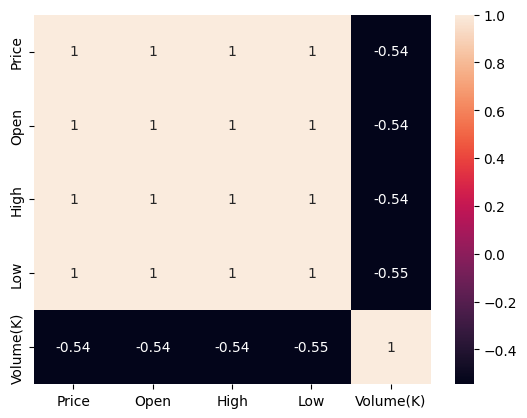

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

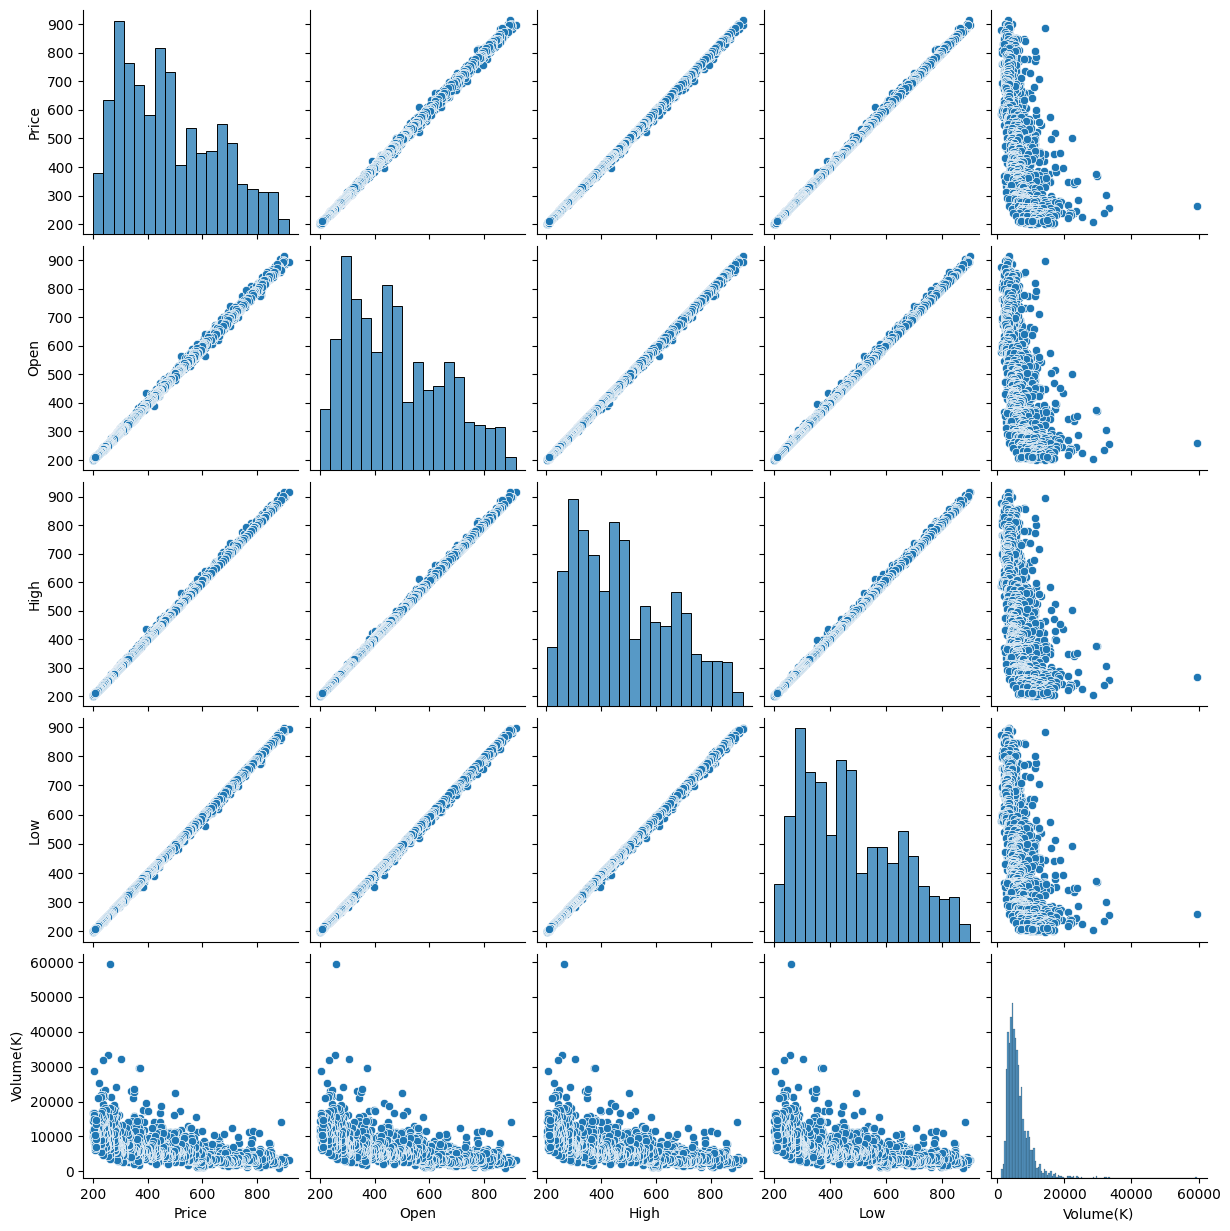

In [17]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

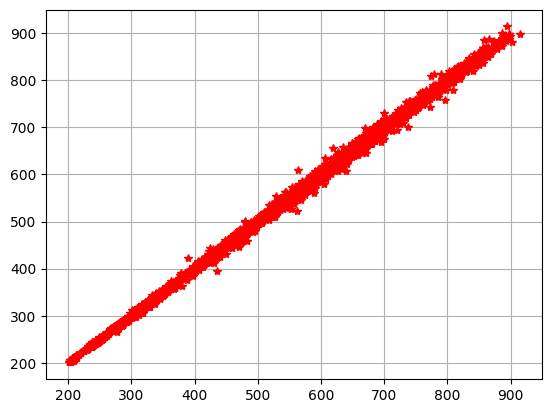

In [18]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [19]:
X=df[['Open']]
X

,Open
0,886.23
1,883.93
2,888.10
3,874.42
4,887.08
...,...
3021,211.78
3022,211.46
3023,212.36
3024,211.03


In [20]:
y=df['Price']
y

0       889.50
1       885.71
2       884.92
3       882.38
4       880.71
         ...  
3021    211.65
3022    211.61
3023    212.24
3024    212.96
3025    209.52
Name: Price, Length: 3026, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99964221]
intercept : 0.26123099019713436


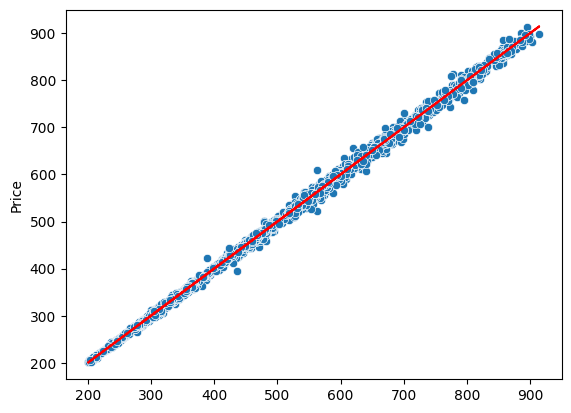

In [25]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [26]:
pred=lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [28]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [29]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.658528503301005
MSE : 42.99621479127978
RMSE : 6.557149898490943
R2 : 0.9986293461559878
Adj R2 : 0.9986284647509834


In [30]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [31]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,4.658529


In [32]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,6.55715


In [33]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.998629


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
rr=Ridge(alpha=0.1)

In [36]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

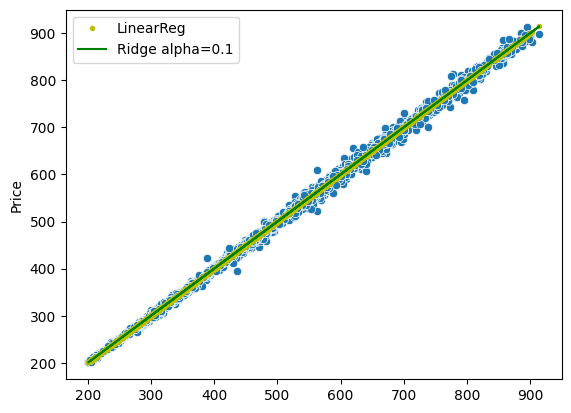

In [37]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [38]:
print(rr.coef_,rr.intercept_)

[0.99964221] 0.2612315712824511


In [39]:
y_pred=rr.predict(X_test)

In [40]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 4.658528510448801
MSE : 42.996214628059434
RMSE : 6.55714988604496
R2 : 0.9986293461611909
Adj R2 : 0.9986284647528325


In [41]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [42]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,4.658529,4.658529


In [43]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,6.55715,6.55715


In [44]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.998629,0.998629


## Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lsr=Lasso(alpha=0.1)

In [47]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [48]:
print(lsr.coef_,lsr.intercept_)

[0.99963888] 0.2628138507898825


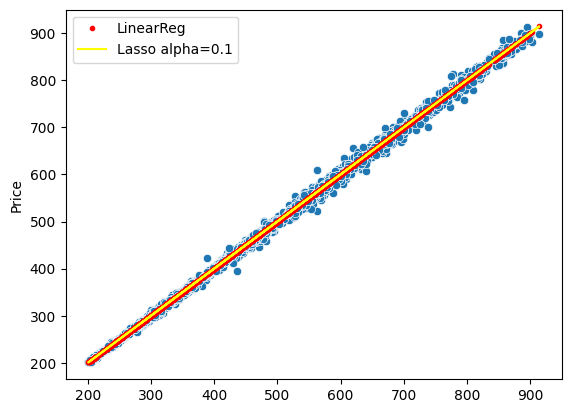

In [49]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [50]:
yl_pred=lsr.predict(X_test)

In [51]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 4.658547973693536
MSE : 42.995770535642926
RMSE : 6.557116022737659
R2 : 0.9986293603181808
Adj R2 : 0.9986284697766658


In [52]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [53]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,4.658529,4.658529,4.658548


In [54]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,6.55715,6.55715,6.557116


In [55]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.998629,0.998629,0.998629


## Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly=PolynomialFeatures(degree=4)

In [58]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

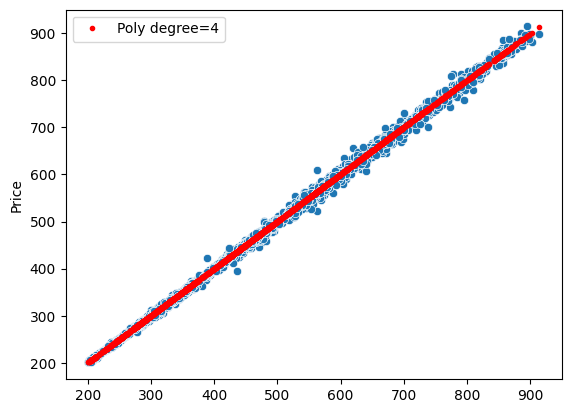

In [59]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [60]:
yp_pred=lin.predict(X_test1)

In [61]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 4.678090680297621
MSE : 43.25654516473941
RMSE : 6.576970819818149
R2 : 0.9986210472201668
Adj R2 : 0.9986201759925655


In [62]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [63]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,4.658529,4.658529,4.658548,4.678091


In [64]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,6.55715,6.55715,6.557116,6.576971


In [65]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.998629,0.998629,0.998629,0.998621


## Ridge on Polynomial Regression

In [66]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.10834e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

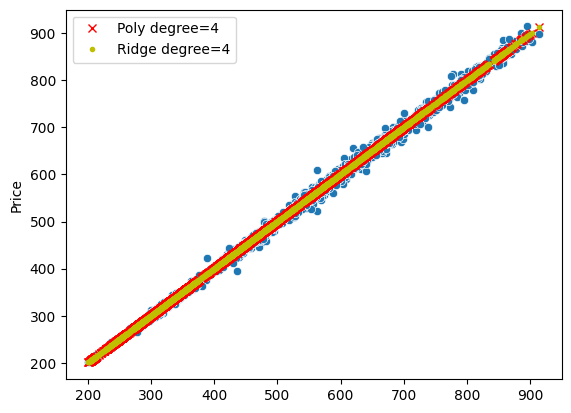

In [67]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [68]:
yr_pred=ridp.predict(X_test1)

In [69]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 4.678090490466583
MSE : 43.25654686924116
RMSE : 6.576970949399211
R2 : 0.9986210471658299
Adj R2 : 0.9986201757807935


In [70]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [71]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,4.658529,4.658529,4.658548,4.678091,4.67809


In [72]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,6.55715,6.55715,6.557116,6.576971,6.576971


In [73]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.998629,0.998629,0.998629,0.998621,0.998621


## Lasso on polynomial of degree 4

In [74]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.702e+04, tolerance: 8.176e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

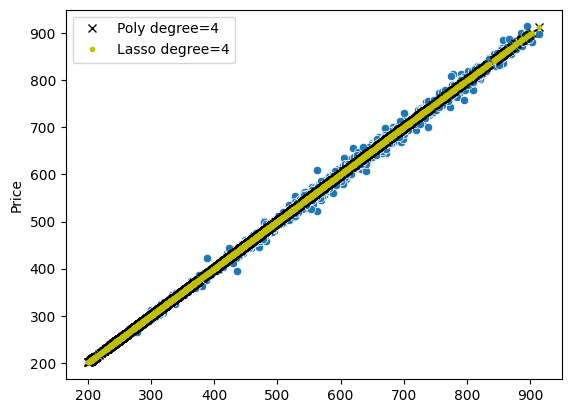

In [75]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [76]:
yl_pred=lsp.predict(X_test1)

In [77]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 4.675990267785055
MSE : 43.22826954747783
RMSE : 6.574820875695233
R2 : 0.9986219486037812
Adj R2 : 0.9986210777427479


In [78]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [79]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599


In [80]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821


In [81]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622


## Multiple Linear Regression

In [82]:
df

,Price,Open,High,Low,Volume(K)
0,889.50,886.23,897.83,886.23,2860.0
1,885.71,883.93,889.91,883.93,2650.0
2,884.92,888.10,896.63,881.14,3780.0
3,882.38,874.42,882.45,865.44,3040.0
4,880.71,887.08,888.52,877.67,3350.0
...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9220.0
3022,211.61,211.46,212.21,210.27,9870.0
3023,212.24,212.36,212.82,211.65,9200.0
3024,212.96,211.03,213.97,211.03,14750.0


In [83]:
df.drop(columns=['High','Low'],inplace=True)
df

,Price,Open,Volume(K)
0,889.50,886.23,2860.0
1,885.71,883.93,2650.0
2,884.92,888.10,3780.0
3,882.38,874.42,3040.0
4,880.71,887.08,3350.0
...,...,...,...
3021,211.65,211.78,9220.0
3022,211.61,211.46,9870.0
3023,212.24,212.36,9200.0
3024,212.96,211.03,14750.0


In [84]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,886.23,2860.0
1,883.93,2650.0
2,888.10,3780.0
3,874.42,3040.0
4,887.08,3350.0
...,...,...
3021,211.78,9220.0
3022,211.46,9870.0
3023,212.36,9200.0
3024,211.03,14750.0


In [85]:
y=df['Price']
y

0       889.50
1       885.71
2       884.92
3       882.38
4       880.71
         ...  
3021    211.65
3022    211.61
3023    212.24
3024    212.96
3025    209.52
Name: Price, Length: 3026, dtype: float64

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [87]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [88]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,0.998351
Volume(K),-0.000121


In [89]:
mlin.intercept_

1.6129066611362646

In [90]:
pred=mlin.predict(X_test)

In [91]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.655850901074654
MSE : 42.806110961016415
RMSE : 6.542637920672091
R2 : 0.9986354063765671
Adj R2 : 0.9986301193900545


In [92]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [93]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599,4.655851


In [94]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821,6.542638


In [95]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622,0.998635


## Applying Ridge Regression on Multiple Linear Regression

In [96]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [97]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,0.998351,0.998351
Volume(K),-0.000121,-0.000121


In [98]:
ridm.intercept_

1.6129077477615397

In [99]:
pred=ridm.predict(X_test)

In [100]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.655850913115982
MSE : 42.806110752474794
RMSE : 6.54263790473497
R2 : 0.998635406383215
Adj R2 : 0.9986301193934339


In [101]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [102]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599,4.655851,4.655851


In [103]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821,6.542638,6.542638


In [104]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622,0.998635,0.998635


## Applying Lasso Regression on Multiple Linear Regression

In [105]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [106]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,0.998351,0.998351,0.998355
Volume(K),-0.000121,-0.000121,-0.000121


In [107]:
lso.intercept_

1.6104183698022894

In [108]:
pred=lso.predict(X_test)

In [109]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.65582439348255
MSE : 42.80657469450648
RMSE : 6.542673359912329
R2 : 0.9986353915934497
Adj R2 : 0.9986301116878195


In [110]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [111]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599,4.655851,4.655851,4.655824


In [112]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821,6.542638,6.542638,6.542673


In [113]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622,0.998635,0.998635,0.998635


## adding more features

In [114]:
df

,Price,Open,Volume(K)
0,889.50,886.23,2860.0
1,885.71,883.93,2650.0
2,884.92,888.10,3780.0
3,882.38,874.42,3040.0
4,880.71,887.08,3350.0
...,...,...,...
3021,211.65,211.78,9220.0
3022,211.61,211.46,9870.0
3023,212.24,212.36,9200.0
3024,212.96,211.03,14750.0


In [115]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_3516\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,889.50,886.23,2860.0,887.148571
1,885.71,883.93,2650.0,887.148571
2,884.92,888.10,3780.0,887.148571
3,882.38,874.42,3040.0,887.148571
4,880.71,887.08,3350.0,887.148571
...,...,...,...,...
3021,211.65,211.78,9220.0,209.545714
3022,211.61,211.46,9870.0,210.221429
3023,212.24,212.36,9200.0,211.302857
3024,212.96,211.03,14750.0,211.605714


In [116]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_3516\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,889.50,886.23,2860.0,887.148571,890.030714
1,885.71,883.93,2650.0,887.148571,890.030714
2,884.92,888.10,3780.0,887.148571,890.030714
3,882.38,874.42,3040.0,887.148571,890.030714
4,880.71,887.08,3350.0,887.148571,890.030714
...,...,...,...,...,...
3021,211.65,211.78,9220.0,209.545714,207.976429
3022,211.61,211.46,9870.0,210.221429,208.383571
3023,212.24,212.36,9200.0,211.302857,208.727143
3024,212.96,211.03,14750.0,211.605714,209.267857


In [117]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=(100-(100/(1+rs)))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_3516\22193716.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI'].fillna(method='bfill',inplace=True)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_3516\22193716.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['RSI'].fillna(method='bfill',inplace=True)


,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,889.50,886.23,2860.0,887.148571,890.030714,1760.755814
1,885.71,883.93,2650.0,887.148571,890.030714,1760.755814
2,884.92,888.10,3780.0,887.148571,890.030714,1760.755814
3,882.38,874.42,3040.0,887.148571,890.030714,1760.755814
4,880.71,887.08,3350.0,887.148571,890.030714,1760.755814
...,...,...,...,...,...,...
3021,211.65,211.78,9220.0,209.545714,207.976429,214.053254
3022,211.61,211.46,9870.0,210.221429,208.383571,235.964912
3023,212.24,212.36,9200.0,211.302857,208.727143,261.122661
3024,212.96,211.03,14750.0,211.605714,209.267857,175.429326


<Axes: >

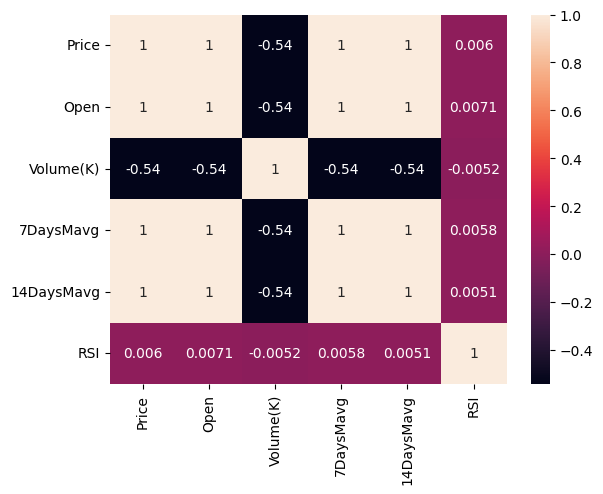

In [118]:
sns.heatmap(df.corr(),annot=True)

In [119]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()
df.isnull().sum()

Price         0
Open          0
Volume(K)     0
7DaysMavg     0
14DaysMavg    0
RSI           0
dtype: int64

In [120]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,886.23,2860.0,887.148571,890.030714,1760.755814
1,883.93,2650.0,887.148571,890.030714,1760.755814
2,888.10,3780.0,887.148571,890.030714,1760.755814
3,874.42,3040.0,887.148571,890.030714,1760.755814
4,887.08,3350.0,887.148571,890.030714,1760.755814
...,...,...,...,...,...
3021,211.78,9220.0,209.545714,207.976429,214.053254
3022,211.46,9870.0,210.221429,208.383571,235.964912
3023,212.36,9200.0,211.302857,208.727143,261.122661
3024,211.03,14750.0,211.605714,209.267857,175.429326


In [121]:
y=df['Price']
y

0       889.50
1       885.71
2       884.92
3       882.38
4       880.71
         ...  
3021    211.65
3022    211.61
3023    212.24
3024    212.96
3025    209.52
Name: Price, Length: 3025, dtype: float64

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [123]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [124]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.663436
Volume(K),-0.000076
7DaysMavg,0.497868
14DaysMavg,-0.162254
RSI,-0.000035


In [125]:
mlin.intercept_

0.8904734810270725

In [126]:
pred=mlin.predict(X_test)

In [127]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 3.601442006789165
MSE : 27.00709862046988
RMSE : 5.196835442889247
R2 : 0.9991572527052958
Adj R2 : 0.9991435360462361


In [128]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599,4.655851,4.655851,4.655824,3.601442


In [129]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821,6.542638,6.542638,6.542673,5.196835


In [130]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622,0.998635,0.998635,0.998635,0.999157


## Ridge

In [131]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [132]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.663436,0.663436
Volume(K),-0.000076,-0.000076
7DaysMavg,0.497868,0.497868
14DaysMavg,-0.162254,-0.162253
RSI,-0.000035,-0.000035


In [133]:
ridm.intercept_

0.890473717531961

In [134]:
pred=ridm.predict(X_test)

In [135]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 3.601441861945385
MSE : 27.00709639269213
RMSE : 5.1968352285494035
R2 : 0.9991572527748128
Adj R2 : 0.9991435361181826


In [136]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599,4.655851,4.655851,4.655824,3.601442,3.601442


In [137]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821,6.542638,6.542638,6.542673,5.196835,5.196835


In [138]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622,0.998635,0.998635,0.998635,0.999157,0.999157


## Lasso

In [139]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e+04, tolerance: 8.161e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [140]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.663436,0.663436,0.701392
Volume(K),-0.000076,-0.000076,-0.000082
7DaysMavg,0.497868,0.497868,0.401701
14DaysMavg,-0.162254,-0.162253,-0.104038
RSI,-0.000035,-0.000035,-0.000035


In [141]:
lso.intercept_

0.9090492557172638

In [142]:
pred=lso.predict(X_test)

In [143]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 3.5855395909503676
MSE : 27.151556414714925
RMSE : 5.210715537689131
R2 : 0.999152744949131
Adj R2 : 0.9991393923347164


In [144]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,4.658529,4.658529,4.658548,4.678091,4.67809,4.67599,4.655851,4.655851,4.655824,3.601442,3.601442,3.58554


In [145]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,6.55715,6.55715,6.557116,6.576971,6.576971,6.574821,6.542638,6.542638,6.542673,5.196835,5.196835,5.210716


In [146]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.998629,0.998629,0.998629,0.998621,0.998621,0.998622,0.998635,0.998635,0.998635,0.999157,0.999157,0.999153
